# HW4

# Ozone Analysis

## __Using the same dataset we explored in class (NASA GEOS-CF):__

### i. Plot a map for O3 concentrations in parts per billion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import cartopy.crs as ccrs

In [2]:
#load netCDF data
ds = xr.open_dataset('GEOS-CF_AirQuality_20180101_0030z.nc4')

In [3]:
#Convert O3 data to ppb
O3 = ds.O3 * 1e9

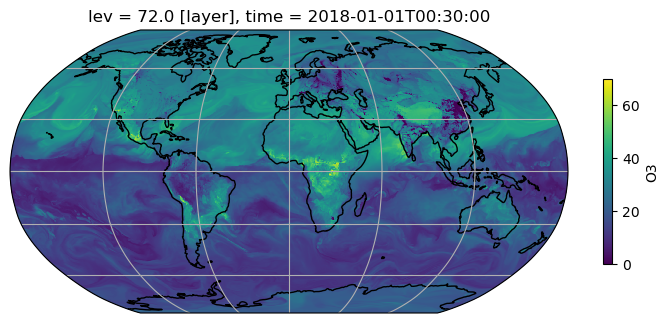

In [4]:
#create map projection and plot [O3] data
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
O3.plot(ax=ax, transform=ccrs.PlateCarree(), 
        cbar_kwargs={'shrink': 0.4}) # This line just makes the axis smaller
ax.coastlines()
ax.gridlines()

### __ii. Answer the following questions:__

###    a. __Where is [$O^3$] qualitatively high?__ ###

The highest [$O^3$] occurs in latitudinal band between ~30°N to ~15°S with concentrations approaching 70ppb in Sub-Saharan Afric, Southern Mexico, and the eastern margin of the Arabian Sea. [$O^3$] is generally higher throughout the Northern Hemisphere than in the Southern Hemisphere. The highest concentrations are over continents and margins in both hemispheres, but the apparent gradient between land and sea surface measurements is much more pronounced in the Southern Hemisphere. 

### b. __What latitude and longitude is [$O^3$] highest?__ ###

In [12]:
O3.where(O3==O3.max(), drop=True).squeeze()

<xarray.DataArray 'O3' ()>
array(69.73278, dtype=float32)
Coordinates:
    lon      float64 -118.8
    lat      float64 34.5
    lev      float64 72.0
    time     datetime64[ns] 2018-01-01T00:30:00

The highest [$O^3$] is ~69.73728 ppb at 34.5°, -118.8°.

### c. __Where is [$O^3$] qualitatively low?__ ###

The lowest [$O^3$] occurs in large areas of the ocean basins in the Southern Hemisphere, and in several smaller continental locations near the Andes, Alps, Ural, and Himalayan mountain ranges. 


### d. __What latitude and longitude is [$O^3$] lowest?__ ###

In [50]:
O3.where(O3==O3.min(), drop=True).squeeze()

<xarray.DataArray 'O3' (lat: 4, lon: 8)>
array([[nan, nan, nan, nan, nan,  0.,  0., nan],
       [nan, nan, nan, nan, nan, nan,  0.,  0.],
       [ 0., nan,  0.,  0.,  0., nan, nan, nan],
       [nan,  0.,  0.,  0.,  0., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 38.5 38.75 39.0 39.25 39.5 73.25 73.5 73.75
  * lat      (lat) float64 53.0 53.25 55.75 56.0
    lev      float64 72.0
    time     datetime64[ns] 2018-01-01T00:30:00

There are multiple locations with [$O^3$] = 0 ppb between 53.0° and 56.0° Lat, and 38.5° and 73.75° Lon. I'll try another method to identify one coordinate within this range.

In [45]:
O3.argmin(dim=['lat', 'lon'])

{'lat': <xarray.DataArray 'O3' (time: 1, lev: 1)>
 array([[572]], dtype=int64)
 Coordinates:
   * lev      (lev) float64 72.0
   * time     (time) datetime64[ns] 2018-01-01T00:30:00,
 'lon': <xarray.DataArray 'O3' (time: 1, lev: 1)>
 array([[1013]], dtype=int64)
 Coordinates:
   * lev      (lev) float64 72.0
   * time     (time) datetime64[ns] 2018-01-01T00:30:00}

In [47]:
print(O3.lat[572], O3.lon[1013])

<xarray.DataArray 'lat' ()>
array(53.)
Coordinates:
    lat      float64 53.0
Attributes:
    long_name:  latitude
    units:      degrees_north <xarray.DataArray 'lon' ()>
array(73.25)
Coordinates:
    lon      float64 73.25
Attributes:
    long_name:  longitude
    units:      degrees_east


So one location with [$O^3$] = 0 ppb is at 53.0°, 73.25°.

### e. __What is [$O^3$] over L.A.?__ ###

In [5]:
# Select a specific location
# L.A. lat/lon is 34.0549° N, 118.2426° W

O3.sel(lat=[34.0549], lon=[-118.2426], method="nearest")

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[45.401974]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -118.2
  * lat      (lat) float64 34.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

[$O^3$] over Los Angeles is ~45.401974 ppb.

### f. __What is [$O^3$] over Hawaii?__ ###

In [9]:
# Select a specific location
# Hawaii lat/lon is 19.8987° N, 155.6659° W

O3.sel(lat=[19.8987], lon=[-155.6659], method="nearest")

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[38.35885]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -155.8
  * lat      (lat) float64 20.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

[$O^3$] over Hawaii is ~38.35885 ppb.

# Final Project Pitch

The goal here is to start thinking about what final project analysis you’ll be doing. To
that end, describe:

i. What data you’ll be working with. Where do you get the data? How much data
do you have (rough #)

Eventually, I would like to collect field samples from feeder dikes of the Columbia River Basalt Group (CRBG) and contacted carbonate country rock from Wallowa Mountains in NE Oregon. The dataset I plan to generated would include coordinates, elevation, rock type, location with respect to contact, and d$^13$C measurements. I do not expect to generate this dataset within the timeframe of this class, so I will likely have to generate an artifical dataset for the project.

ii. What type of analysis do you want to do? For example:

I'm not exactly sure what the most appropriate analysis would be, but I think possibly emulation. My goal is to use the dataset to estimate possible isotopic compositions of CO2 emsissions associated with the Columbia River Flood Basalt based on the observed patterns of d13C both across the zone of thermal alteration at specific elevations, and along the vertical extent of dike exposures, extrapolated to a range of minimum and maximum spatial scenarios. 

iii. Why could this analysis be scientifically important?

There is not, to my knowledge, any existing published research that seriously attempts to make any quantative estimate of how the isotopic composition of intruded carbonate country rock may impact the the carbon isotope composition of volcanic emissions thorugh fractionation and gas exchange associated with thermal alteration and partial melting. This data gap has made it very difficult to evaluate the possible contribution of the Columbia River Flood Basalt event to the so-called Monterey Excursion, a ~1‰ positive shift in benthic d13C roughly coincident with both the the Mid-Miocene Climate Optimum.